# Sentimental Analysis
This is a Notebook of the project Sentimental Analysis on reviews about Amazon Musical Instruments.I am passionate about applying Artificial Intelligence across diverse domains to streamline tasks, enhance decision-making, and uncover deep, data-driven insights

### Libraries

Python libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NLP Text Libraries

In [2]:
import string,time
import re
import nltk
import nltk.corpus
import abbreviations
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import emoji
from abbreviations import abbreviations
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE


Models and their metrics

In [4]:
# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay

### Dataset

We got the csv formatted dataset from the Kaggle website which consists of vast amount of feedback from the users of Instruments.

Link to the Dataset: [Amazon Musical Instruments Reviews](https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews)

##### Description of columns:

1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

In [5]:
df = pd.read_csv("Musical_instruments_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [6]:
df.shape

(10261, 9)

From the shape we can say that there are 10,261 reviews

In [7]:
df['overall'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

The column **'overall'** is the rating given by the users and we can see that most of them rated 4.0 and 5.0 .

### Data Preprocessing

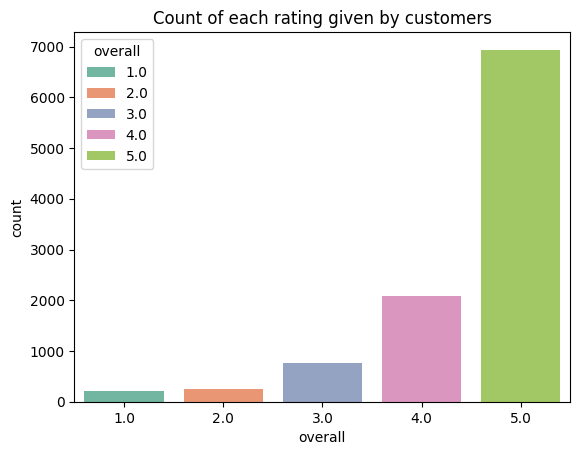

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

In [8]:
sns.countplot(x ='overall',hue='overall', data=df, palette='Set2')
plt.title("Count of each rating given by customers", loc = "center")
plt.show()
df['overall'].value_counts()

From above plot we can see that most of the reviewers rated 5.0 which  means that they were satisfied with the product

Finding Null Values

In [9]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

Our main focus will be on **reviewText** and we cannot remove these null value rows because the **ratings** and **summary** given from the customers will have some effects to our model 

Replace Null Values

In [10]:
df['reviewText'] = df['reviewText'].fillna("")

Concatenating **'reviewText'** and **'summary'** for combined text processing

In [11]:
df['Review'] = df['reviewText'] + ' ' + df['summary']
df.drop(columns=['reviewText','summary'],axis = 1,inplace=True)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


##### Labelling

Basically our dataset doesn't have any target variable so based on the ratings we will classify the reviews into three categories as shown below:
- For overall rating > 3 - Positive

- For overall rating < 3 - Negatice

- For overall rating = 3 - Neutral

Later we will convert these categories into numbers

In [12]:
def labelling(rating):
    if rating['overall'] > 3:
        return 'Positive'
    elif rating['overall'] < 3:
        return 'Negative'
    else:
        return 'Neutral'
df['Label'] = df.apply(labelling,axis=1)
df['Label'].head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Label, dtype: object

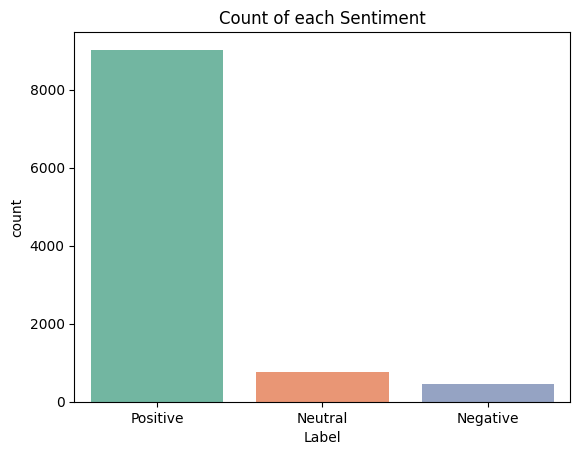

Label
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64

In [13]:
sns.countplot(x ='Label',hue = 'Label', data=df, palette='Set2',)
plt.title("Count of each Sentiment", loc = "center")
plt.show()
df['Label'].value_counts()

### Text Preprocessing

In [14]:
# we do not want to remove "not" word because it plays a crucial role in the sentiment
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

In [15]:
def text_preprocessing(text):
    # Lowercasing
    text = text.lower()
    
    # Removing HTML Tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Removing URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Converting emojis to text
    # we are using demojize to secure the meaning of the emoji
    text = emoji.demojize(text)
    
    # Expanding abbreviations
    text = " ".join([abbreviations.get(word, word) for word in text.split()])
    
    # Removing punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords (keep negations) & lemmatize
    Lemmatizer = WordNetLemmatizer()
    tokens = [Lemmatizer.lemmatize(word) for word in tokens if word not in Stopwords]
    
    return " ".join(tokens)   

In [16]:
# Applying text pre-process to the Review column
df['Review'] = df['Review'].apply(text_preprocessing)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Review,Label
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordablei not realized...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive


### N - Gram Analysis

In [18]:
def N_Gram_Analysis(Corpus, Gram):
  # Vectorizer
  Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
  Vectorizer = CountVectorizer(stop_words = list(Stopwords), ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words

Filter the Data based on sentiments

In [19]:
Positive = df[df['Label'] == 'Positive'].dropna()
Neutral = df[df['Label'] == 'Neutral'].dropna()
Negative = df[df['Label'] == 'Negative'].dropna()

Uni - Gram Analysis:

Positive Sentiment Reviews:

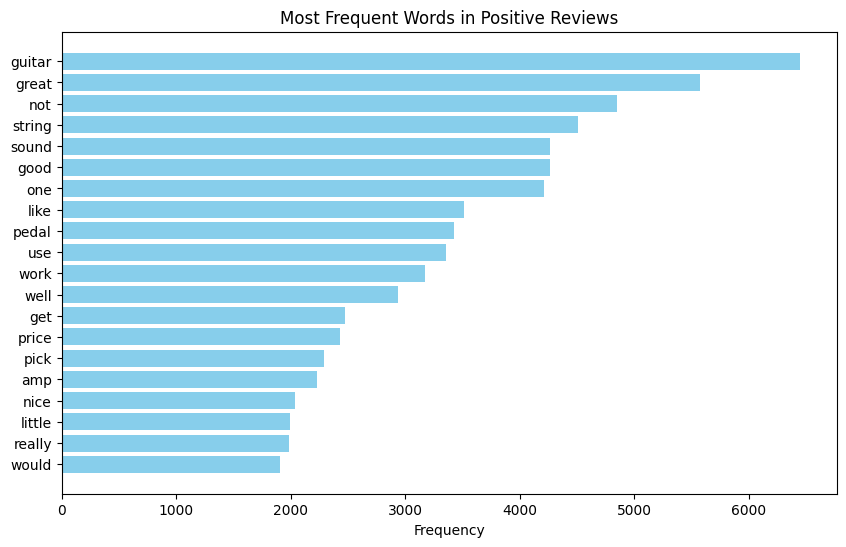

In [20]:
pos_words = N_Gram_Analysis(Positive['Review'],1)
pos_frame = pd.DataFrame(pos_words,columns=['words','counts'])

top_words = pos_words[:20]  # top 10 words
labels, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.title("Most Frequent Words in Positive Reviews")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

WordCloud

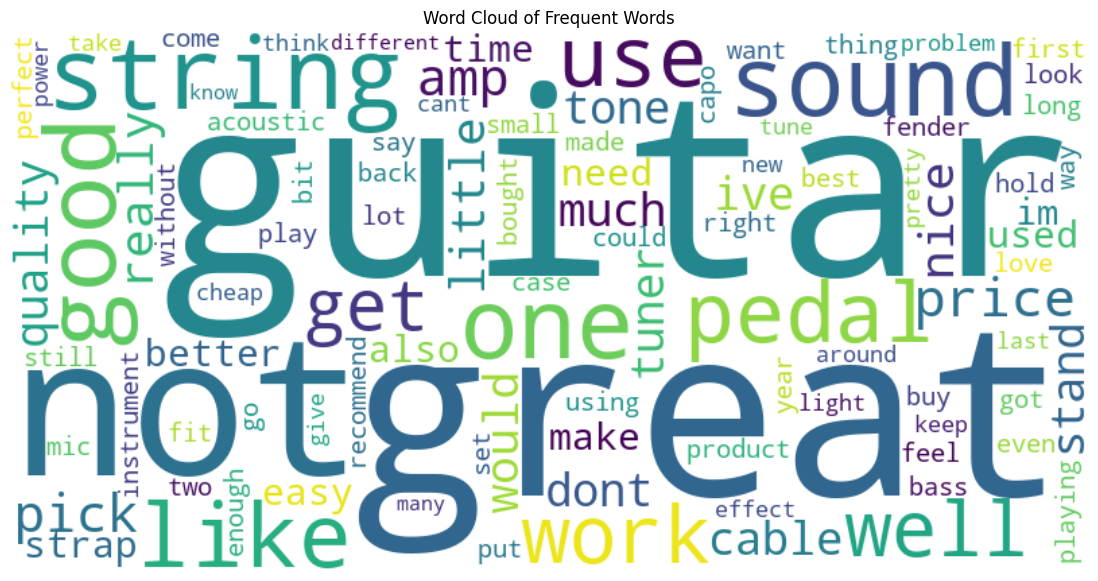

In [21]:
word_freq_dict = dict(pos_words[:100])  # limit to top 100
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

Neutral Sentiment Reviews:

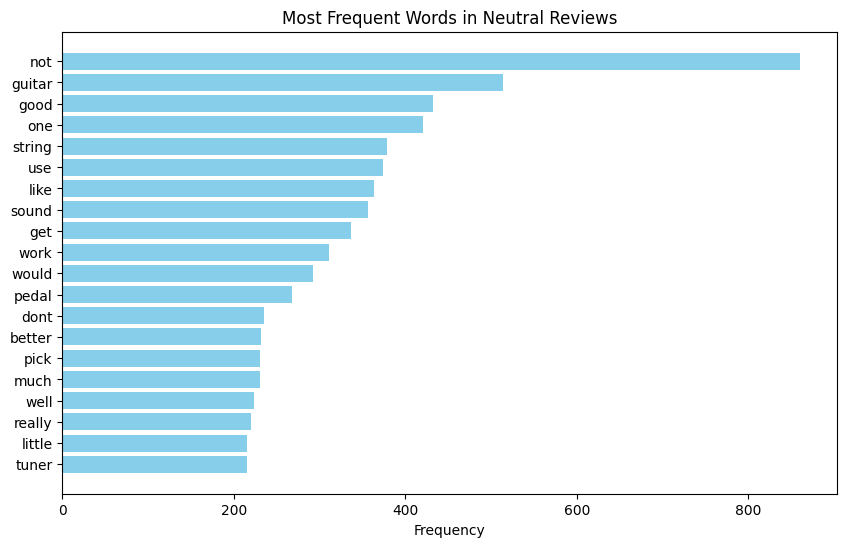

In [22]:
neu_words = N_Gram_Analysis(Neutral['Review'],1)
neu_frame = pd.DataFrame(neu_words,columns=['words','counts'])

top_words = neu_words[:20]  # top 10 words
labels, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.title("Most Frequent Words in Neutral Reviews")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

WordCloud

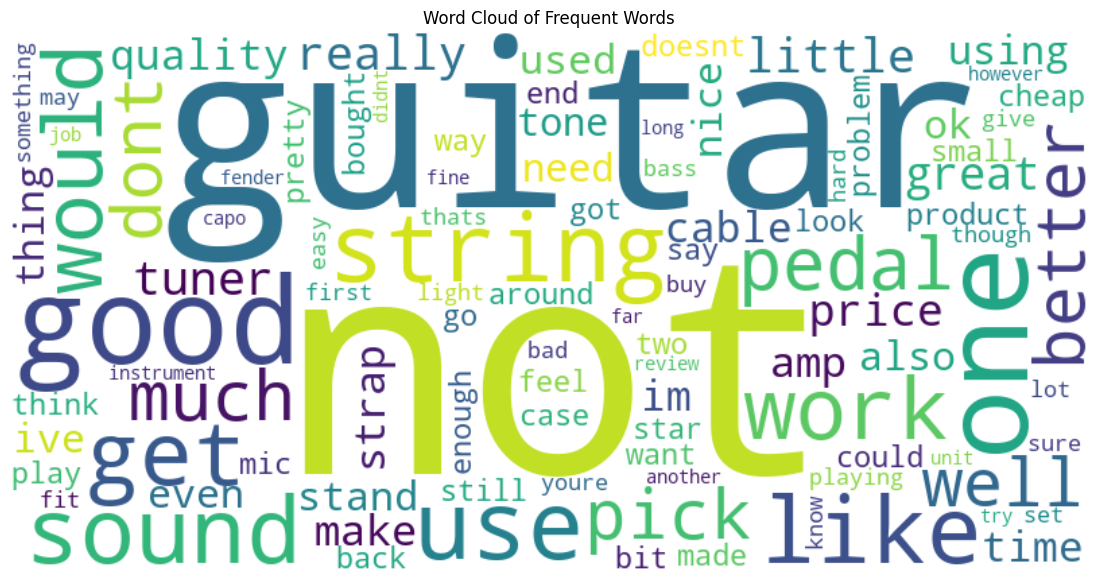

In [23]:
word_freq_dict = dict(neu_words[:100])  # limit to top 100
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

Negative Sentiment Reviews:

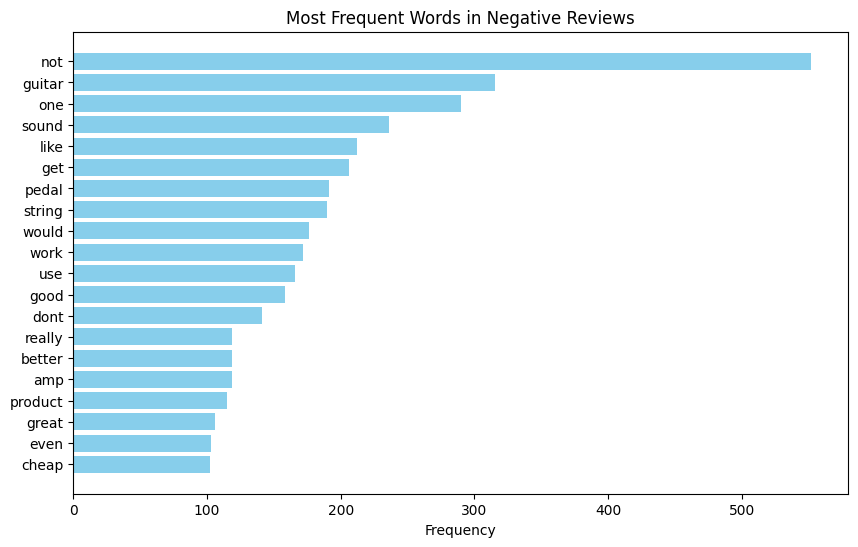

In [24]:
neg_words = N_Gram_Analysis(Negative['Review'],1)
neg_frame = pd.DataFrame(neg_words,columns=['words','counts'])

top_words = neg_words[:20]  # top 10 words
labels, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.title("Most Frequent Words in Negative Reviews")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

WordCloud

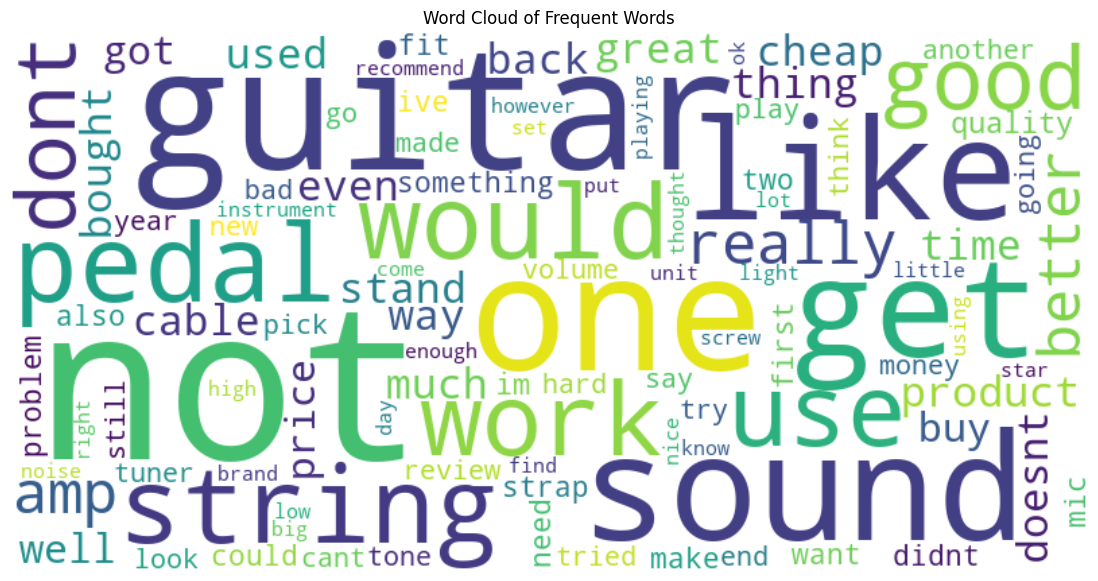

In [25]:
word_freq_dict = dict(neg_words[:100])  # limit to top 100
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

Bi-Gram Analysis:

Positive Sentiment Reviews:

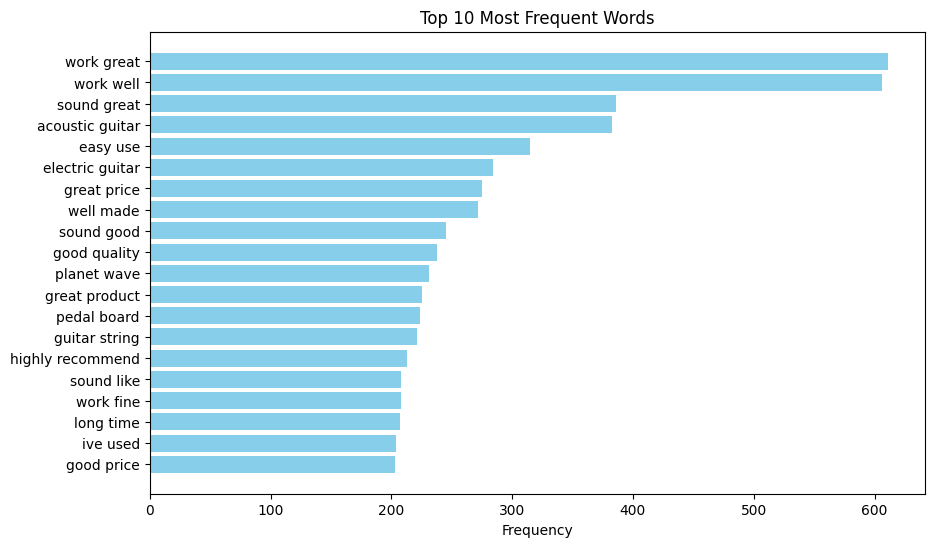

In [26]:
pos_words = N_Gram_Analysis(Positive['Review'],2)
pos_frame = pd.DataFrame(pos_words,columns=['words','counts'])

top_words = pos_words[:20]  # top 10 words
labels, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

Neutral Sentiment Reviews:

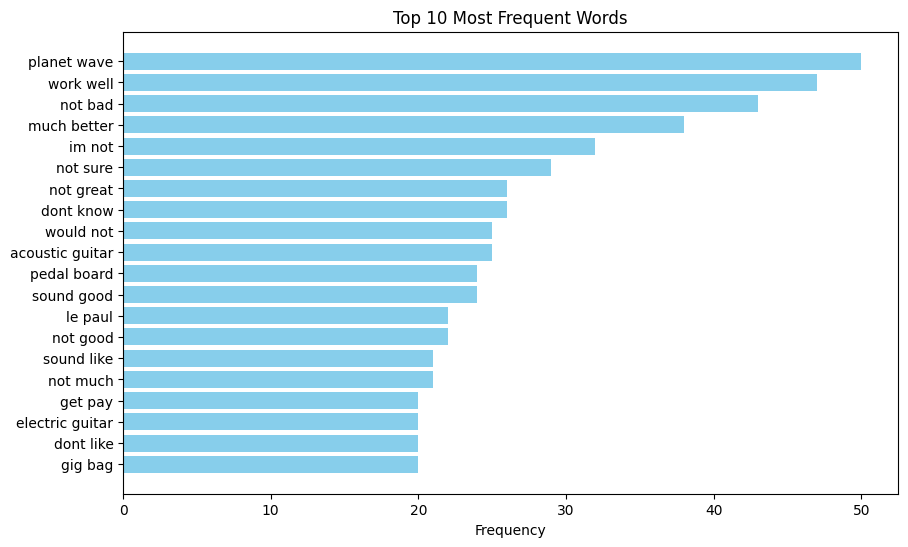

In [27]:
neu_words = N_Gram_Analysis(Neutral['Review'],2)
neu_frame = pd.DataFrame(neu_words,columns=['words','counts'])

top_words = neu_words[:20]  # top 10 words
labels, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

Negative Sentiment Reviews:

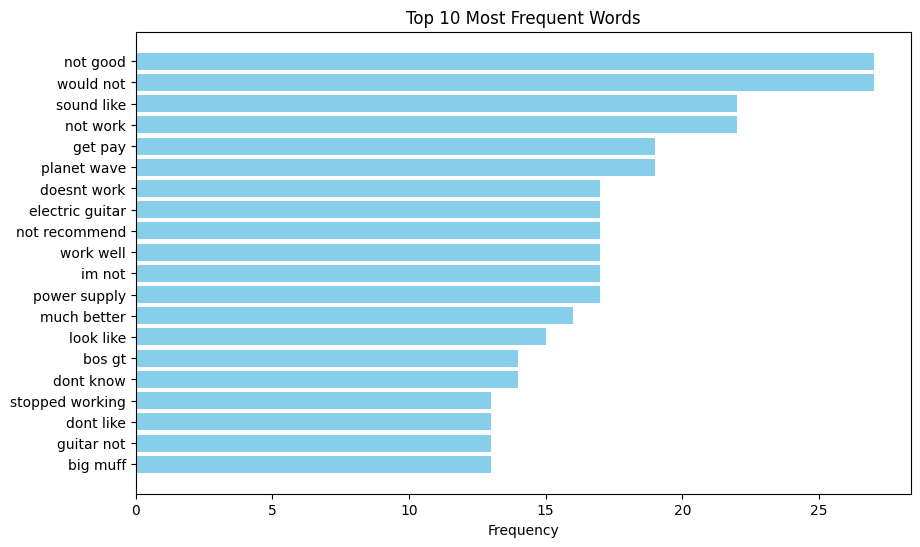

In [28]:
neg_words = N_Gram_Analysis(Negative['Review'],2)
neg_frame = pd.DataFrame(neg_words,columns=['words','counts'])

top_words = neg_words[:20]  # top 10 words
labels, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

### Feature Engineering

In [29]:
dataset = df[['Review','Label']]
dataset.head()

,Review,Label
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordablei not realized...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


Encoding our Target Variable

In [30]:
Encoder = LabelEncoder()
dataset.loc[:,'Encoded_label'] = Encoder.fit_transform(dataset['Label'])
list(enumerate(Encoder.classes_))

C:\Users\kalvi\AppData\Local\Temp\ipykernel_14544\198217192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,'Encoded_label'] = Encoder.fit_transform(dataset['Label'])


[(0, 'Negative'), (1, 'Neutral'), (2, 'Positive')]

- Negative as '0'

- Neutral as '1'
- Positive as '2'

In [31]:
dataset['Encoded_label'].value_counts()

Encoded_label
2    9022
1     772
0     467
Name: count, dtype: int64

Tf-Idf Vectorizer

In [32]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
x = tfidf.fit_transform(dataset['Review'])
x.shape

(10261, 5000)

From the shape, we can say that we've transformed our reviews with Tf-Idf vectorizer to 5000 top bigram words.

In [33]:
y = dataset['Encoded_label']
y.value_counts()

Encoded_label
2    9022
1     772
0     467
Name: count, dtype: int64

Now, as we know from before, our data is kind of imbalanced with very little neutral and negative values compared to positive sentiments. We need to balance our dataset before going into modelling process.

In [34]:
Balancer = SMOTE()
x_f,y_f = Balancer.fit_resample(x,y)
y_f.value_counts()

Encoded_label
2    9022
1    9022
0    9022
Name: count, dtype: int64

Splitting the Dataset for training and testing

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size = 0.25, random_state = 42)

Models

First we will find our best model using the accuracy metric from cross validation technique.

We are using K-Fold Cross Validation on our early dataset (before resampling) because the CV itself is not affected by the imbalanced dataset as it splits the dataset and takes into account every validations. If we use the CV on the balanced dataset that we got from resampling we should be able to get similar result.

In [36]:
Models = {"K-Nearest Neighbors":KNeighborsClassifier(),"Bernoulli Naive Bayes":BernoulliNB(),"Logistic Regression":LogisticRegression(),"Support Vector Classifier":SVC(),"Random Forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier()}
print('Cross Validation Results:')
cv_results = {}

for name,model in Models.items():
    scores = cross_val_score(model,x,y,cv=10,scoring='accuracy')
    mean_score = np.mean(scores)
    cv_results[name]= mean_score
    print(f"{name:25s} --> Accuracy: {mean_score:.4f}")
    


Cross Validation Results:
K-Nearest Neighbors       --> Accuracy: 0.8623
Bernoulli Naive Bayes     --> Accuracy: 0.8121
Logistic Regression       --> Accuracy: 0.8822
Support Vector Classifier --> Accuracy: 0.8806
Random Forest             --> Accuracy: 0.8774
Decision Tree             --> Accuracy: 0.8152


We did 10-fold Cross Validation from which we got the best model to be **'Logistic Regression'**.Now, we will use the best model in predicting our sentiment, also to tune our parameter and evaluate the end-result of how well the model works.

##### Hyperparameter Tuning for Logistic Regression using GridSearchCV

In [41]:
Param = {"C": np.logspace(-4, 4, 20), "penalty": ['l1', 'l2'],"solver": ['saga']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.64 %
Best Parameters: {'C': np.float64(3792.690190732246), 'penalty': 'l2', 'solver': 'saga'}


C:\Users\kalvi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Using the Hypertuned Logistic Regression:

In [42]:
Best_Model = LogisticRegression(random_state=42,C=3792.690190732246,penalty='l2')
Best_Model.fit(x_train,y_train)
y_pred = Best_Model.predict(x_test)
print('Accuracy --->',accuracy_score(y_test,y_pred))
print('classification_report','\n',classification_report(y_test,y_pred))
print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))

Accuracy ---> 0.9506428254765775
classification_report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      2225
           1       0.93      0.99      0.96      2277
           2       1.00      0.87      0.93      2265

    accuracy                           0.95      6767
   macro avg       0.95      0.95      0.95      6767
weighted avg       0.95      0.95      0.95      6767

confusion_matrix 
 [[2224    0    1]
 [  32 2243    2]
 [ 123  176 1966]]


C:\Users\kalvi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix Plot

<function matplotlib.pyplot.show(close=None, block=None)>

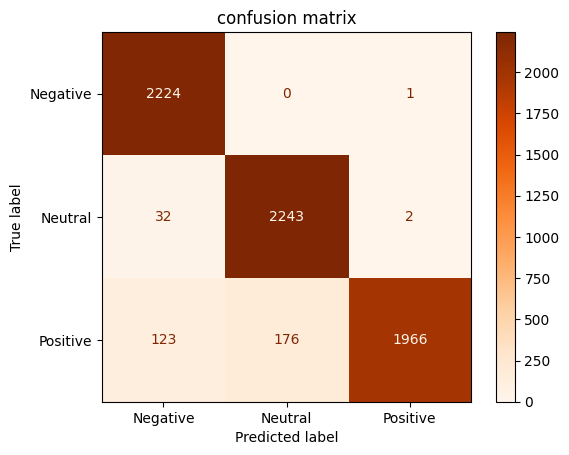

In [43]:
cm = confusion_matrix(y_test,y_pred)
class_names = Encoder.classes_

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot(cmap=plt.cm.Oranges)
plt.title("confusion matrix")
plt.show